# Proyecto EDA

In [3]:
import pandas as pd

### Importación del dataset

Dataset relacionado con la industria del cine, en el que se destacan columnas como BUDGET, REVENUE, o VALORACIÓN. Se van a responder preguntas que pueden resultar de interés, como si la puntuación que tiene se puede considerar fiable, en base a la cantidad de votos acumulados, o si las películas con mayor presupuesto son las que han obtenido más éxito en taquilla.

In [4]:
df_films = pd.read_csv('../data/tmdb_5000_movies.csv')

### Revisión de las dimensiones y primeras filas

Inicialmente hay 4803 filas y 20 columnas. No sabemos si todos los campos serán útiles o si, por el contrario, habrá que añadir alguna columna, combinando las que ya hay, para obtener algunas conclusiones tras el estudio de los datos.

In [5]:
df_films.shape

(4803, 20)

Utilizamos la función head para explorar las 5 primeras filas. Como no añadimos ningún parámetro entre paréntesis, nos devuelve las 5 primeras filas de forma predeterminada. 

In [6]:
df_films.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Al no tratarse de un dataset muy basado en los números, la función describe() no arroja una información demasiado relevante, aun así se invoca también para observar los valores numéricos devueltos.

In [5]:
df_films.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Revisión de los tipos de datos de las columnas

Se confirma lo que ya hemos comentado, solamente 7 de las columnas tratan tipos de datos numéricos.

In [7]:
df_films.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

### Corrección de tipos

Todos las columnas tienen el tipo de dato que les corresponde. Aún así, vamos a asegurarnos de que las numéricas no contienen campos que no sean numéricos.

Solamente vamos a hacer esta comprobación en las siguientes columnas, porque las columnas ID y RUNTIME contienen información numérica con la que no vamos a hacer operaciones. Por tanto, no importaría que fueran números insertados como cadenas de texto.

In [8]:
columnas_numericas = ['budget','popularity','revenue','vote_average','vote_count']

In [9]:
def verificar_columnas_numericas(df, columnas):
    resultados = {}
    for col in columnas:
        # Intentar convertir la columna a numérica (enteros o flotantes)
        converted = pd.to_numeric(df[col], errors='coerce')
        # Si hay valores NaN tras la conversión, esos valores no son numéricos
        if converted.isnull().any() and not df[col].isnull().all():
            # Encontrar los valores que no se pudieron convertir
            no_numericos = df[col][converted.isnull() & df[col].notnull()].unique()
            resultados[col] = f"No es numérica. Valores no numéricos encontrados: {no_numericos}"
        else:
            resultados[col] = "Es numérica"
    return resultados

Se confirma que los valores de estas columnas son numéricos.

In [10]:
resultado = verificar_columnas_numericas(df_films, columnas_numericas)
resultado

{'budget': 'Es numérica',
 'popularity': 'Es numérica',
 'revenue': 'Es numérica',
 'vote_average': 'Es numérica',
 'vote_count': 'Es numérica'}

### Distribución inicial de las columnas

In [11]:
df_films.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Los nombres de columnas están bastante bien definidos, no contienen espacios ni signos extraños para tener que renombrarlos. 

Aún así, por tener mayor facilidad para trabajar con los datos y para poder realizar algún cambio en los nombres de columnas, se renombran en castellano intentando simplificarlos en la medida de lo posible.

In [12]:
df_films = df_films.rename(columns= {'budget':'presupuesto', 'genres':'generos', 'homepage':'web', 'id':'id', 
'keywords':'palabras_clave', 'original_language':'lenguaje', 'original_title':'titulo_original', 'overview':'descripcion',
'popularity':'popularidad', 'production_companies':'productoras', 'production_countries':'pais', 'release_date':'fecha',
'revenue':'ganancia','runtime':'duracion','spoken_languages':'lenguajes', 'status':'estado', 'tagline':'eslogan',
'title':'titulo','vote_average':'puntuacion', 'vote_count':'votos'})

Así quedarían los nombres de columnas tras esta transformación:

In [13]:
df_films.columns

Index(['presupuesto', 'generos', 'web', 'id', 'palabras_clave', 'lenguaje',
       'titulo_original', 'descripcion', 'popularidad', 'productoras', 'pais',
       'fecha', 'ganancia', 'duracion', 'lenguajes', 'estado', 'eslogan',
       'titulo', 'puntuacion', 'votos'],
      dtype='object')

### Duplicados

Con la función duplicated() se obtiene true cuando se detectan filas duplicadas.

Si se comparan filas completas obtenemos 0 duplicados.

In [14]:
df_films.duplicated().sum()

np.int64(0)

En cambio, si concretamos a campos de una columna concreta, es más fácil encontrar duplicados.

Vamos a probar si hay duplicados en dos columnas, en las que se considera importante que sus valores sean únicos en el género que estamos tratando: ID y TITULO de la película.



In [19]:
df_films.id.duplicated().sum()

np.int64(0)

En la columna TITULO si que se encuentran campos duplicados, concretamente 3.

In [18]:
df_films.titulo.duplicated().sum()

np.int64(3)

Se comprueba que se trata de películas que tienen el mismo título, pero no coinciden ni en fecha de lanzamiento ni en duración. Por lo tanto, se trata de obras con el mismo título, pero totalmente diferentes, no hay conflicto entre ellas y no se cree conveniente realizar ningún tipo de limpieza o borrado con estos datos.

In [17]:
duplicados = df_films[df_films.titulo.duplicated(keep=False)]
duplicados[['titulo','fecha','duracion']].sort_values(by='titulo')

,titulo,fecha,duracion
1359,Batman,1989-06-23,126.0
4267,Batman,1966-07-30,105.0
3647,Out of the Blue,1980-05-01,94.0
3693,Out of the Blue,2006-10-12,103.0
972,The Host,2013-03-22,125.0
2877,The Host,2006-07-27,119.0


Para el resto de columnas no es decisivo si tienen valores duplicados. Por tanto, se da esta fase por concluída.

### Valores nulos

Se utiliza la función info(), que devuelve la cantidad de campos no nulos de cada columna.

In [16]:
df_films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   presupuesto      4803 non-null   int64  
 1   generos          4803 non-null   object 
 2   web              1712 non-null   object 
 3   id               4803 non-null   int64  
 4   palabras_clave   4803 non-null   object 
 5   lenguaje         4803 non-null   object 
 6   titulo_original  4803 non-null   object 
 7   descripcion      4800 non-null   object 
 8   popularidad      4803 non-null   float64
 9   productoras      4803 non-null   object 
 10  pais             4803 non-null   object 
 11  fecha            4802 non-null   object 
 12  ganancia         4803 non-null   int64  
 13  duracion         4801 non-null   float64
 14  lenguajes        4803 non-null   object 
 15  estado           4803 non-null   object 
 16  eslogan          3959 non-null   object 
 17  titulo        

Con la función isnull() encontramos dónde están concretamente los valores nulos.

Las columnas WEB y ESLOGAN son las que más campos nulos contienen. Por tanto, se pasa a estudiarlas más profundamente.

In [20]:
nulos = df_films.isnull()
nulos.sum()

presupuesto           0
generos               0
web                3091
id                    0
palabras_clave        0
lenguaje              0
titulo_original       0
descripcion           3
popularidad           0
productoras           0
pais                  0
fecha                 1
ganancia              0
duracion              2
lenguajes             0
estado                0
eslogan             844
titulo                0
puntuacion            0
votos                 0
dtype: int64

El porcentaje de nulos en la columna WEB supera el 20% de los campos totales de la columna y, además, teniendo en cuenta el valor que tiene el contenido de esta columna en el contexto en el que está hecho el dataset, se concluye que podemos prescindir de ella sin afectar al análisis de datos.

In [21]:
df_films = df_films.drop('web', axis=1)

El resto de columnas no supera este porcentaje de nulos y, aunque alguna columna como ESLOGAN tenga un porcentaje alto de nulos, no se elimina de momento.

Así quedarían respecto a nulos las columnas restantes:

In [22]:
nulos_actual = df_films.isnull()
nulos_actual.sum()

presupuesto          0
generos              0
id                   0
palabras_clave       0
lenguaje             0
titulo_original      0
descripcion          3
popularidad          0
productoras          0
pais                 0
fecha                1
ganancia             0
duracion             2
lenguajes            0
estado               0
eslogan            844
titulo               0
puntuacion           0
votos                0
dtype: int64

Para comprobar que es correcto todo lo que ha lanzado la función isnull(), se realizan consultas a los datos que nos señala como nulos en estas columnas y se comprueba que, efectivamente, existen. Sin embargo, a excepción de la fecha, que lo veremos en el proceso de normalización de forma más específica, no se considera información determinante o que pueda dar problemas a la hora de agrupar datos.

In [23]:
nulos_descripcion = df_films.loc[df_films['descripcion'].isnull(), ['titulo','descripcion']]
nulos_descripcion

,titulo,descripcion
2656,Chiamatemi Francesco - Il Papa della gente,NaN
4140,"To Be Frank, Sinatra at 100",NaN
4431,Food Chains,NaN


In [24]:
nulos_duracion = df_films.loc[df_films['duracion'].isnull(), ['titulo','duracion']]
nulos_duracion

,titulo,duracion
2656,Chiamatemi Francesco - Il Papa della gente,NaN
4140,"To Be Frank, Sinatra at 100",NaN


### Incoherencias

Con la función sample() buscamos una muestra aleatoria del dataframe para buscar posibles incoherencias. 

Se encuentran, en algunas columnas, signos de puntuación no necesarios como {} o [] y otro tipo de meta información que sobra. Por ejemplo, en las columnas GENEROS, PALABRAS_CLAVE, PRODUCTORAS, PAÍS, LENGUAJES.

In [25]:
df_films.sample()

,presupuesto,generos,id,palabras_clave,lenguaje,titulo_original,descripcion,popularidad,productoras,pais,fecha,ganancia,duracion,lenguajes,estado,eslogan,titulo,puntuacion,votos
1278,40000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",266396,"[{""id"": 782, ""name"": ""assassin""}, {""id"": 2708,...",en,The Gunman,Eight years after fleeing the Congo following ...,26.935458,"[{""name"": ""StudioCanal"", ""id"": 694}, {""name"": ...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2015-02-16,13644292,115.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",Released,Armed With the Truth.,The Gunman,5.5,392


Para la limpieza de estos datos, se crea la función LIMPIAR_TEXTO, en la que se eliminan estos signos de puntuación.

In [26]:
def limpiar_texto(aux):
    if isinstance(aux, str):
        return aux.replace('[','').replace(']','').replace('"','').replace('{','').replace('}','')
    else:
        return aux

Se crea una lista de variables con las columnas a las que queremos quitarles estos signos y se invoca la función LIMPIAR_TEXTO, con la ayuda de la función map, que aplica dicha función a cada una de ellas.

In [27]:
columnas_a_limpiar = ['generos','palabras_clave','productoras','pais','lenguajes']
df_films[columnas_a_limpiar] = df_films[columnas_a_limpiar].map(limpiar_texto)

Se comprueba que esta función elimina correctamente los signos de puntuación de estas columnas.

In [28]:
df_films.sample()

,presupuesto,generos,id,palabras_clave,lenguaje,titulo_original,descripcion,popularidad,productoras,pais,fecha,ganancia,duracion,lenguajes,estado,eslogan,titulo,puntuacion,votos
2864,12000000,"id: 18, name: Drama, id: 53, name: Thriller",60599,"id: 9665, name: cover-up, id: 184116, name: he...",en,Arbitrage,"A troubled hedge fund magnate, desperate to co...",16.40512,"name: Lionsgate, id: 1632, name: Artina Films,...","iso_3166_1: US, name: United States of America",2012-09-14,35485056,100.0,"iso_639_1: en, name: English",Released,Power is the best alibi.,Arbitrage,6.1,294


A continuación, se extrae la información importante y se elimina la meta información con la función EXTRAER.

Para ello, se observa el modo en que está contenida la información en las columnas y se saca la conclusión de que, en la mayoría de estas columnas, la información relevante está tras "name:". Por tanto, se procede a extraer esta información y deshacernos del resto.

In [29]:
def extraer(df, columnas, regex=r'name:\s*([^,]+)'):
    for col in columnas:
        names = df_films[col].str.extractall(regex)[0]
        df_films[col] = names.groupby(level=0).agg(', '.join)
    return df_films


En el caso concreto de la columna LENGUAJE, se detecta que la información con la que nos queremos quedar está tras "iso_639_1", puesto que ahí se revela el diminutivo de cada lenguaje. Por este motivo, aplicamos la misma función EXTRAER, pero actualizando la expresión regular.  

In [30]:
def extraer_lenguaje(df, columna, regex=r'iso_639_1:\s*([^,]+)'):
    #for col in columnas:
    names = df_films[columna].str.extractall(regex)[0]
    df_films[columna] = names.groupby(level=0).agg(', '.join)
    return df_films

Aplicamos ambas funciones al dataframe y observamos los resultados obtenidos.

In [31]:
columnas_extraidas = ['generos','palabras_clave','productoras','pais']
df_films = extraer(df_films, columnas_extraidas)
df_films = extraer_lenguaje(df_films, 'lenguajes')

Se comprueba que los datos de estas columnas se han quedado, de este modo, más limpios y más legibles.

In [33]:
df_films.head(5)

,presupuesto,generos,id,palabras_clave,lenguaje,titulo_original,descripcion,popularidad,productoras,pais,fecha,ganancia,duracion,lenguajes,estado,eslogan,titulo,puntuacion,votos
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,"en, es",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,en,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,880674609,148.0,"fr, en, es, it, de",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,en,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,en,Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Normalización de fechas y categorías

##### Normalización de fechas

Se detecta que, en muchos campos, el formato de la fecha es '%Y-%m-%d'. Por ello, se crea una función que compruebe que tiene este formato, en todos los campos, para normalizar la columna FECHA.

Por otro lado, no se considera la fecha un dato clave, así que se acepta que algunas fechas sean nulas con la función any().

In [34]:
def fechas_correctas(df, columna):
    fechas_convertidas = pd.to_datetime(df[columna], format='%Y-%m-%d', errors='coerce')
    return fechas_convertidas.notna().any()

In [35]:
fechas_correctas(df_films,'fecha')

np.True_

Esta fecha es un ejemplo de que hay valores nulos. Sin embargo, no se elimina este campo, porque este dato no es esencial para el análisis que se está realizando.

In [36]:
nulos_fecha = df_films.loc[df_films['fecha'].isnull(), ['titulo','fecha']]
nulos_fecha

,titulo,fecha
4553,America Is Still the Place,NaN


##### Depuración de categorías

Nos aseguramos de que todos los valores de la columna ID son únicos, pues no pueden existir dos películas diferentes con el mismo ID.


In [37]:
df_films.sample()

,presupuesto,generos,id,palabras_clave,lenguaje,titulo_original,descripcion,popularidad,productoras,pais,fecha,ganancia,duracion,lenguajes,estado,eslogan,titulo,puntuacion,votos
4082,1000000,Drama,72213,"father, faith",en,Courageous,"As law enforcement officers, Adam Mitchell, Na...",5.961119,"TriStar Pictures, Provident Films, Affirm Film...",United States of America,2011-09-30,34522221,129.0,en,Released,Honor Begins at Home.,Courageous,6.8,77


Con la función "todos_unicos" comprobamos que todos los campos de la columna ID sean diferentes.

In [38]:
def todos_unicos(df, columna):
    filas = len(df)
    unicos = df[columna].nunique()

    return filas == unicos

Se confirma que todos son diferentes porque devuelve True.

In [39]:
todos_unicos(df_films,'id')

True

Otra cosa que se puede hacer es asegurar que las columnas PRESUPUESTO, DURACION, PUNTUACIÓN y VOTOS son positivas, pues no tendría sentido que fueran menores que 0 en ningún caso.

In [40]:
columnas_positivas = ['presupuesto', 'duracion', 'puntuacion', 'votos']

In [41]:
if df_films[columnas_positivas].lt(0).any().any():
    valores_negativos = df_films[df_films[columnas_positivas].lt(0).any(axis=1)][columnas_positivas]
    print(valores_negativos)
else:
    print("No hay valores negativos en las columnas seleccionadas")

No hay valores negativos en las columnas seleccionadas


### 1º Análisis de datos

Viendo los datos que tenemos en el dataframe, sería oportuno obtener un top 25 (por ejemplo) de las mayores puntuaciones obtenidas por las películas, para comprobar las mejor valoradas de una forma lo más objetiva posible. Para ello, se cree oportuno comprobar que,la puntuación que tienen las películas en el dataset, está respaldada por una cantidad de votos considerable; no seria un dato real una puntuación de 10.0 y obtenida por un solo voto, habiendo películas con miles de votos, pero con puntuación algo inferior.

Se crea una función VALORACION en la que se meten por parámetro, el df, y las columnas valoración y número de votos.

Una vez que tenemos todos los datos, usamos la siguiente fórmula tipo de IMDB para penalizar películas con pocos votos.

La idea es combinar ambas columnas:
<li> R: la puntuación de la película (columna puntuación) </li>
<li> v: El número de votos (columna votos)</li>

Y compararlas contra:
<li> C: la media de puntuaciones de todo el dataset </li>
<li> m: un mínimo de votos para considerar fiable una película. En este caso el cuantil 50, que equivale a la mediana del conjunto de datos </li>


La fórmula aplicada sería algo así como lo que se muestra en la siguiente imagen.

<img src='imdb.jpg'>

In [42]:
def valoracion(df, columna_valoracion, columna_votos):
    # Cálculo valoración media global
    media = df[columna_valoracion].mean()
    # Cálculo percentil 50 del número de votos
    percentil = df[columna_votos].quantile(0.5)
    # Aplicar fórmula de ranking ponderado
    df['rank_ponderado'] = ((df[columna_votos] / (df[columna_votos] + percentil)) * (df[columna_valoracion] + (percentil / (df[columna_votos] + percentil)) * media)).round(2)

    df = df.sort_values('rank_ponderado', ascending=False)
    return df


Utilizamos la función generada anteriormente, con los nombres específicos de nuestro dataframe, para cada parámetro.

In [43]:
valoracion_ponderada = valoracion(df_films, 'puntuacion', 'votos')

Comprobamos que se ha generado correctamente la columna RANK_PONDERADO y pasamos a la parte de representación gráfica

In [44]:
df_films[['titulo','rank_ponderado']].head()

,titulo,rank_ponderado
0,Avatar,7.18
1,Pirates of the Caribbean: At World's End,6.84
2,Spectre,6.27
3,The Dark Knight Rises,7.56
4,John Carter,6.04


In [46]:
import matplotlib.pyplot as plt

A continuación, se muestra un histograma con la representación de todas las películas en función de la puntuación obtenida en el ranking ponderado, generado con la función creada. 

En el eje y, se representan la puntuación obtenida de forma ponderada y, en el eje x, la cantidad de películas con cada nota, siendo el máximo de nota algo más de un 8 y, el mínimo, un 0.

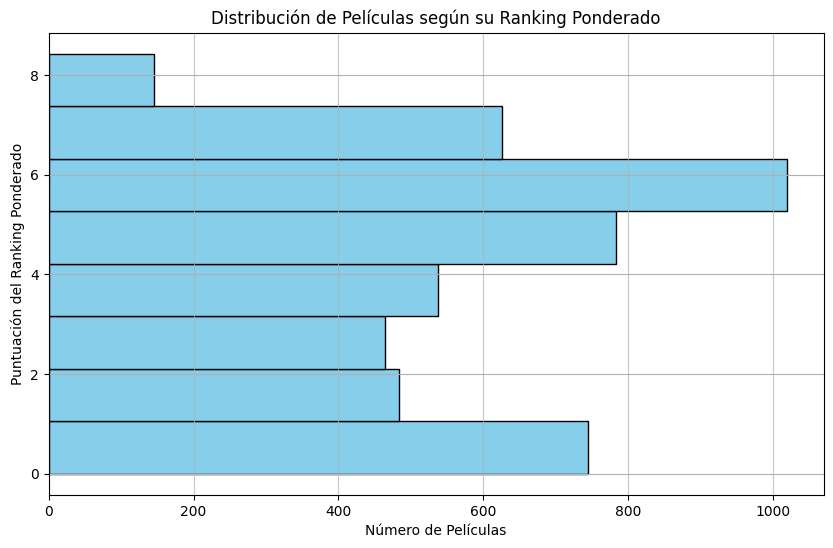

In [47]:
df_films['rank_ponderado'].hist(bins=8, orientation='horizontal', 
                               color='skyblue', edgecolor='black', figsize=(10,6))
plt.ylabel('Puntuación del Ranking Ponderado')
plt.xlabel('Número de Películas')
plt.title('Distribución de Películas según su Ranking Ponderado')
plt.grid(axis='x', alpha=0.7)
plt.show()

Concluímos que no son muchas las películas que superan la nota de 8 porque,como es normal, la opinión de los usuarios es algo muy subjetivo.

A continuación, vamos a hacer el top de las 25 mejores películas según el ranking ponderado, para obtener datos más relevantes y concretos de películas.

In [49]:
top25 = df_films.sort_values('rank_ponderado', ascending=False)[:25][['titulo','rank_ponderado']]

Aquí se muestra la representación de este top con un diagrama de barras horizontal, donde también se puede apreciar la nota concreta obtenida para cada película.

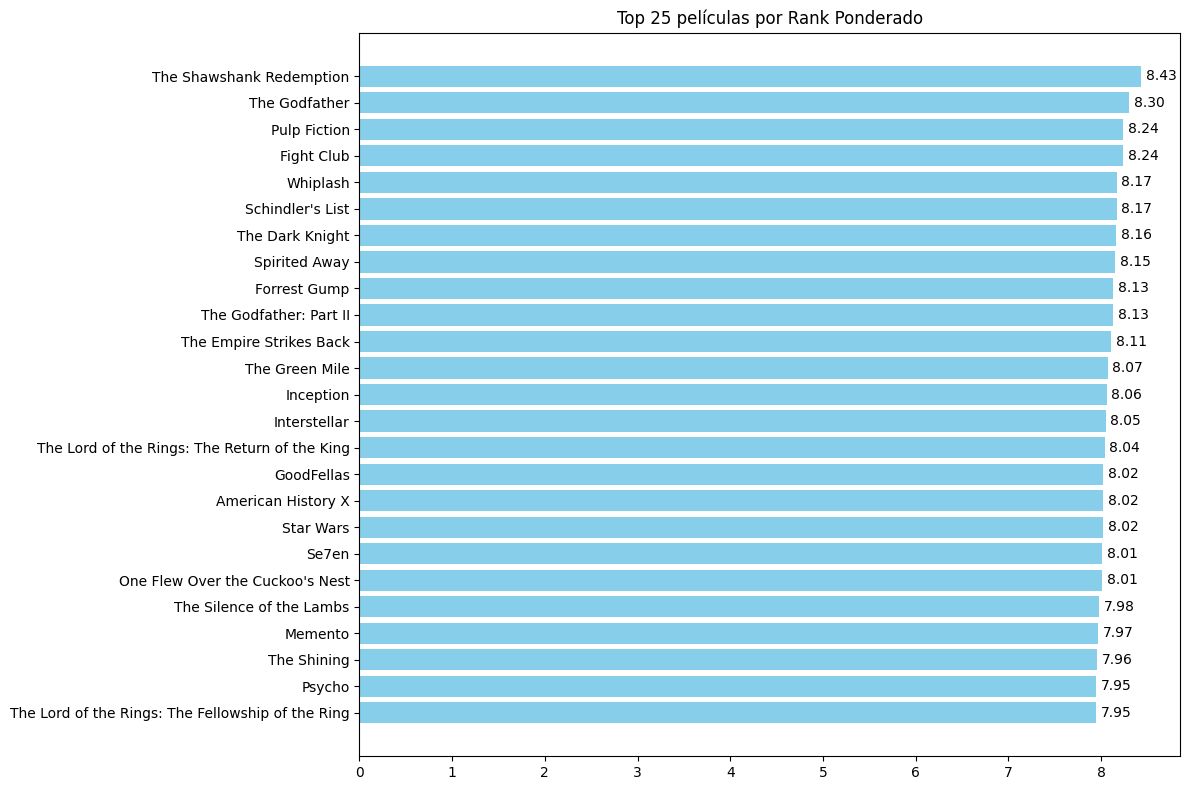

In [51]:
plt.figure(figsize=(12, 8))
bars = plt.barh(top25['titulo'], top25['rank_ponderado'], color='skyblue')
plt.title('Top 25 películas por Rank Ponderado')
plt.gca().invert_yaxis()

# Añadir etiquetas con las notas al final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()

Se observa que la película que mejor puntuación ha obtenido es "The Shawshank Redemption" (en castellano Cadena Perpetua). Sin embargo, igual hay gente que la cambiaría por el número 2 del ranking pues, como se ha dicho antes, es algo muy subjetivo... &#x1F600; 

### 2º Análisis de datos

Otro análisis que podemos hacer es el beneficio que se ha obtenido de cada producción, ya que tenemos una columna que se refiere al presupuesto de las películas y otra referida a las ganancias acumuladas de cada una de ellas.

Para ello, se crea una nueva columna llamada BENEFICIO, mediante la función OBTENER_BENEFICIO. En ella se representa el beneficio obtenido, tras restarle a las ganancias acumuladas, el presupuesto para realizar la película.

In [46]:
def obtener_beneficio(df, presupuesto, ganancia):
    df['beneficio'] = df['ganancia'] - df['presupuesto']

    return df

In [47]:
beneficio = obtener_beneficio(df_films, 'puntuacion', 'votos')

Comprobamos que se ha creado la columna BENEFICIO.

In [48]:
df_films.head()

,presupuesto,generos,id,palabras_clave,lenguaje,titulo_original,descripcion,popularidad,productoras,pais,...,ganancia,duracion,lenguajes,estado,eslogan,titulo,puntuacion,votos,rank_ponderado,beneficio
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",...,2787965087,162.0,"en, es",Released,Enter the World of Pandora.,Avatar,7.2,11800,7.18,2550965087
1,300000000,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,...,961000000,169.0,en,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,6.84,661000000
2,245000000,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",...,880674609,148.0,"fr, en, es, it, de",Released,A Plan No One Escapes,Spectre,6.3,4466,6.27,635674609
3,250000000,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,...,1084939099,165.0,en,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,7.56,834939099
4,260000000,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,...,284139100,132.0,en,Released,"Lost in our world, found in another.",John Carter,6.1,2124,6.04,24139100


Y, con ella, procedemos a la representación de los datos.

A continuación, aparece el top de películas con más beneficios. En primera posición, con mucha diferencia, está la película "Avatar", con 2,5 billones de ganancia tras restarle el presupuesto para su realización.

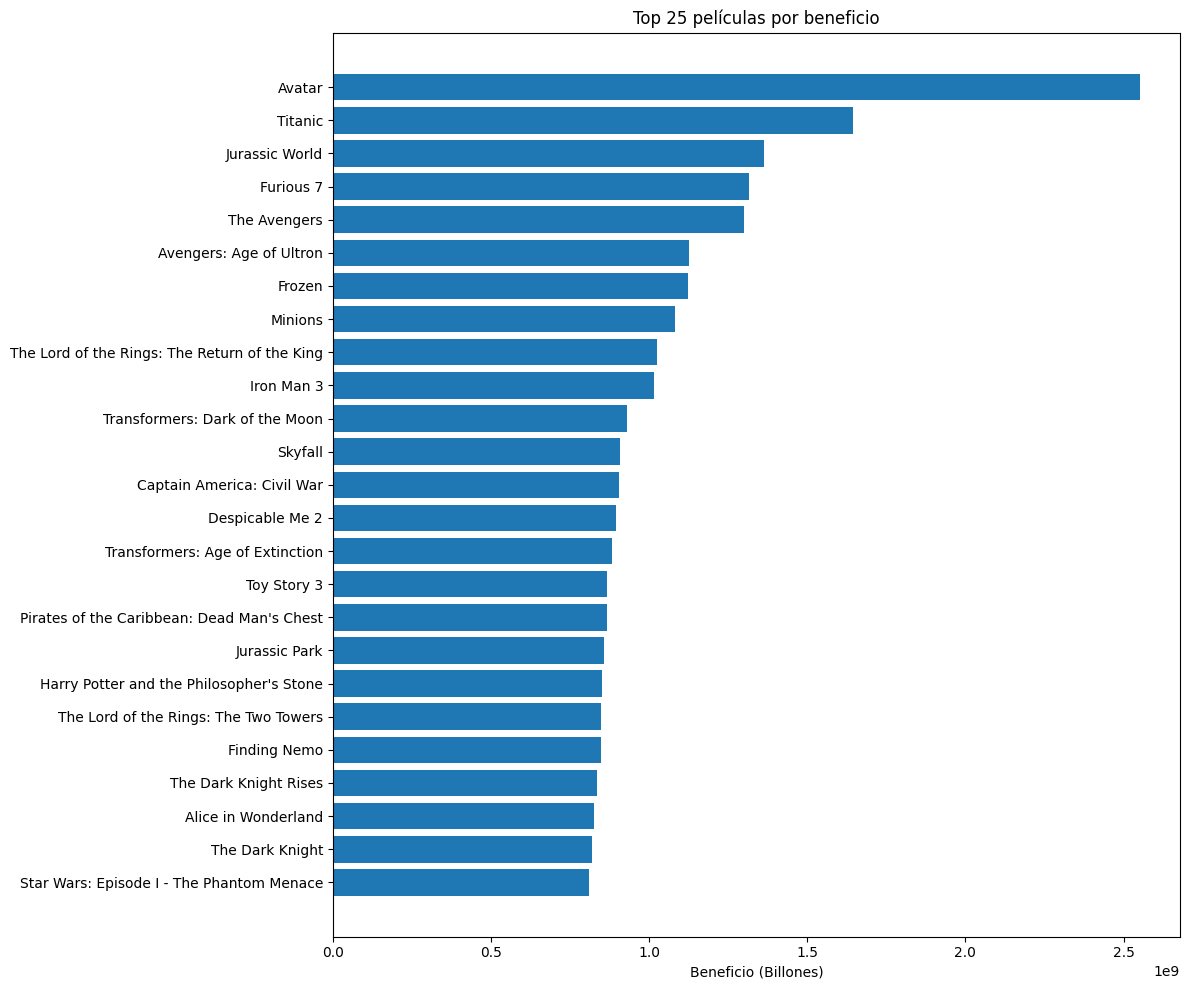

In [49]:
top_25 = df_films.nlargest(25, 'beneficio')[['titulo', 'beneficio']].sort_values('beneficio')  # Ordena ascendente para barras horizontales

plt.figure(figsize=(12, 10))
plt.barh(top_25['titulo'], top_25['beneficio'])
plt.xlabel('Beneficio (Billones)')
plt.title('Top 25 películas por beneficio')
plt.tight_layout()
plt.show()

Aunque la anterior gráfica revela datos interesantes, vamos a compararla con la siguiente, en la que se obtiene el top 25 de películas con mayor presupuesto. En esta gráfica, observamos que la película con mayor beneficio no es la que más presupuesto tenía pues, en la tabla de mayores presupuestos, se sitúa en la posición 18, como se puede ver a continuación. Por tanto, podemos sacar la conclusión de que no hay una relación directa entre presupuesto y ganancias.

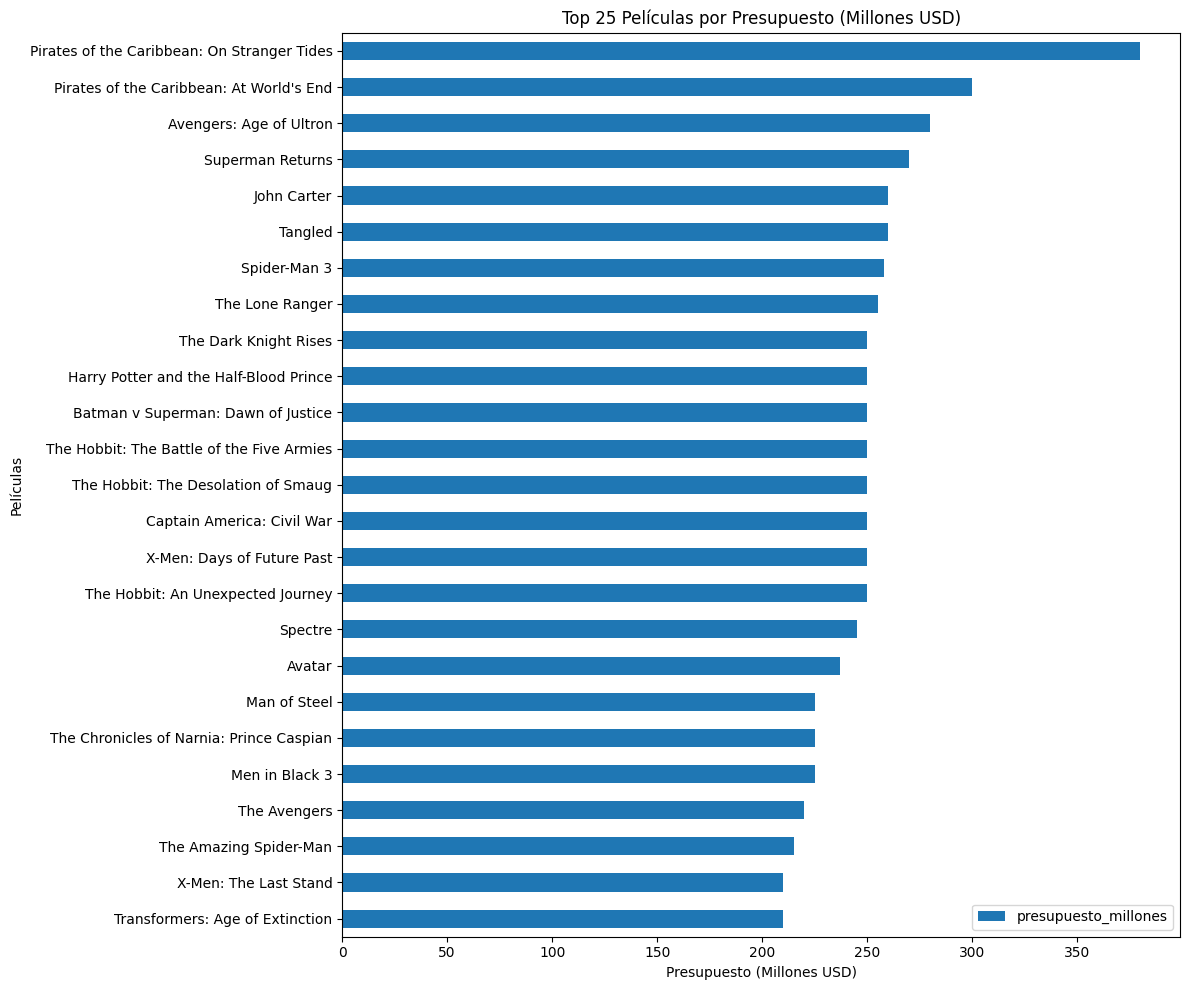

In [50]:
top25 = df_films.nlargest(25, 'presupuesto')[['titulo', 'presupuesto']]
top25['presupuesto_millones'] = top25['presupuesto'] / 1_000_000  # Conversión a millones

top25.plot(kind='barh', x='titulo', y='presupuesto_millones', figsize=(12, 10))
plt.title('Top 25 Películas por Presupuesto (Millones USD)')
plt.xlabel('Presupuesto (Millones USD)')
plt.ylabel('Películas')
plt.gca().invert_yaxis()  # Orden descendente visual
plt.tight_layout()
plt.show()

Para corroborar esta conclusión, vamos a realizar una gráfica de estos dos datos, de forma simultánea, y ordenando por presupuesto. Así, podemos observar que hay algunas películas con un presupuesto importante, pero que luego han obtenido muchas menos ganancias e, incluso, pérdidas.

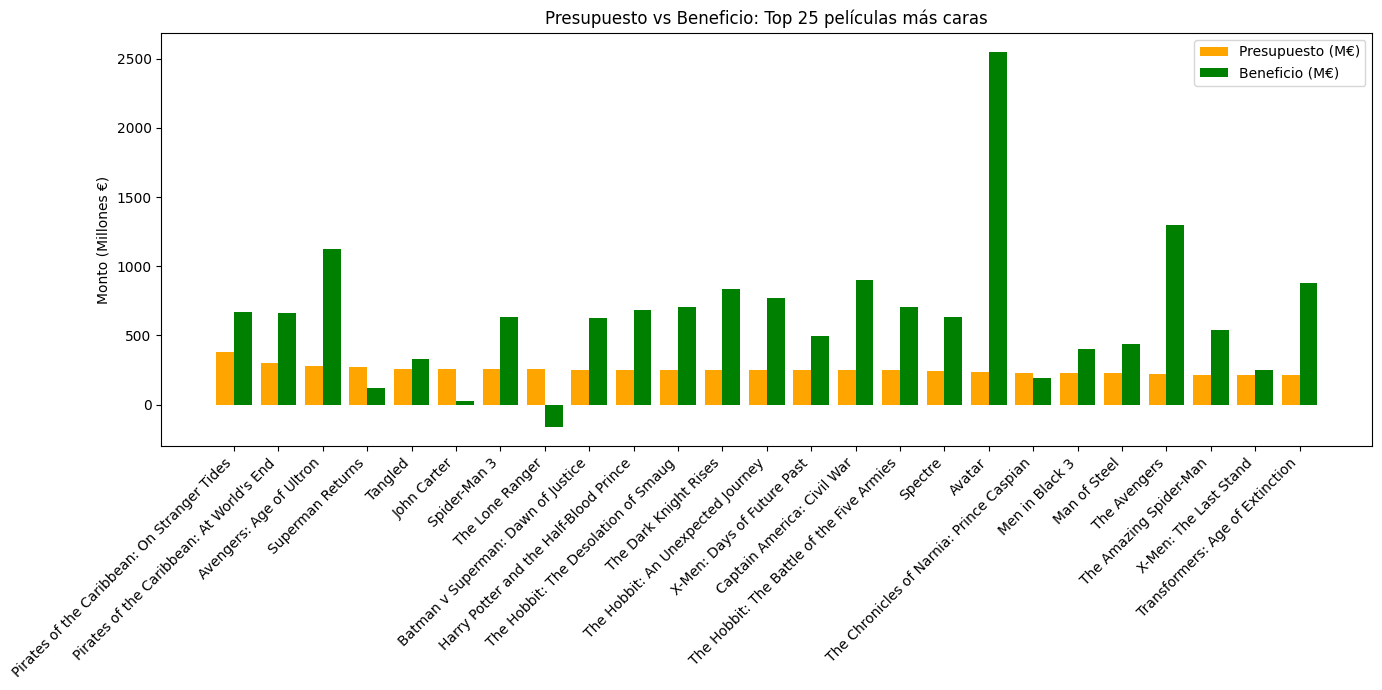

In [51]:
# Ordena por presupuesto descendente y toma top 25
df_sorted = df_films.sort_values('presupuesto', ascending=False).head(25)

# Crea el gráfico
plt.figure(figsize=(14, 7))
ind = range(len(df_sorted))
plt.bar([x - 0.2 for x in ind], df_sorted['presupuesto']/1000000, width=0.4, label='Presupuesto (M€)', color='orange')
plt.bar([x + 0.2 for x in ind], df_sorted['beneficio']/1000000, width=0.4, label='Beneficio (M€)', color='green')
plt.xticks(ind, df_sorted['titulo'], rotation=45, ha='right')  # Títulos en eje X
plt.ylabel('Monto (Millones €)')
plt.title('Presupuesto vs Beneficio: Top 25 películas más caras')
plt.legend()
plt.tight_layout()
plt.show()


### 3. Análisis de datos

Por último, se van a tratar de unir los dos análisis de datos anteriores, con el fin de averiguar si las películas mejor valoradas son las que más presupuesto tenían cuando se crearon, o las que más beneficios generaron una vez que se le ha restado el presupuesto a las ganancias.

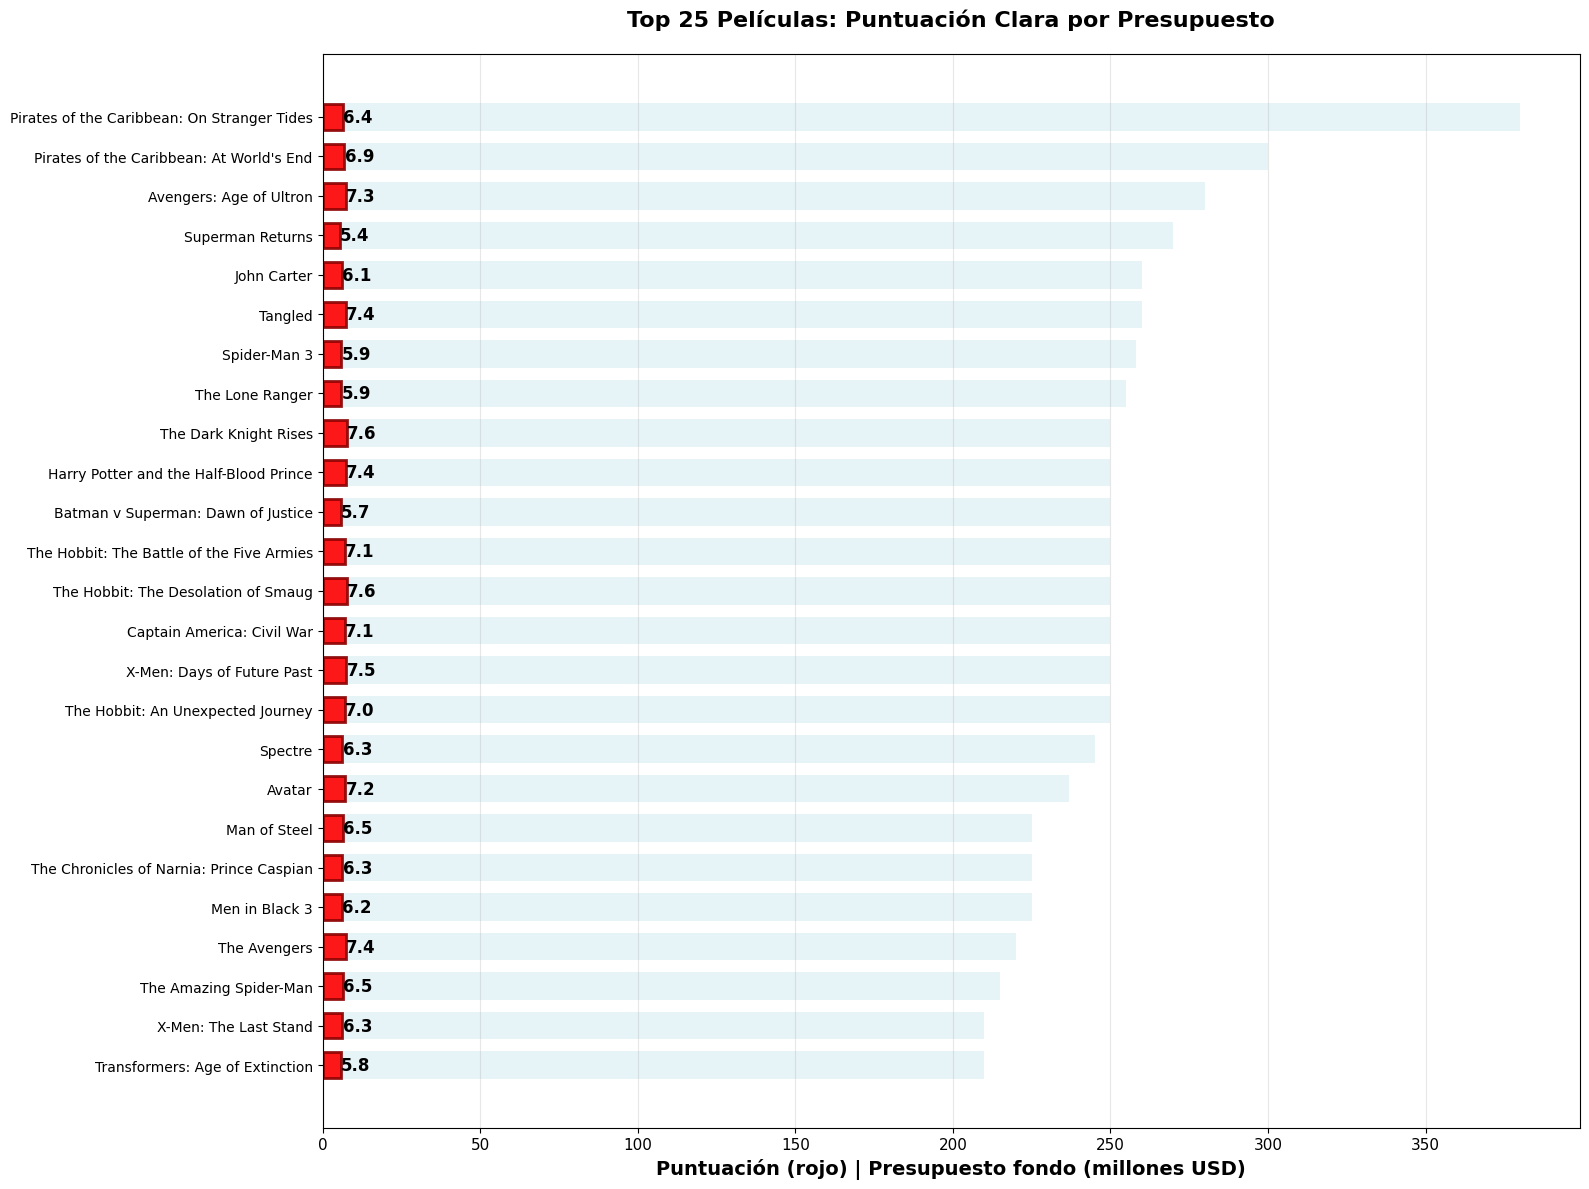

In [53]:
# Preparar datos (ajusta 'puntuacion' al nombre real de tu columna)
top25 = df_films.nlargest(25, 'presupuesto')[['titulo', 'presupuesto', 'puntuacion']]
top25 = top25.sort_values('presupuesto', ascending=False)
top25['presupuesto_millones'] = top25['presupuesto'] / 1_000_000

# Gráfico con puntuación MÁS CLARA (barras grandes + etiquetas)
fig, ax = plt.subplots(figsize=(16, 12))

# Barras de presupuesto (fondo sutil)
ax.barh(top25['titulo'], top25['presupuesto_millones'], 
        color='lightblue', alpha=0.3, height=0.7)

# Barras de puntuación MUY VISIBLES (rojas, gruesas)
bars = ax.barh(top25['titulo'], top25['puntuacion'], 
               color='red', alpha=0.9, height=0.65, edgecolor='darkred', linewidth=2)

# ETIQUETAS NUMÉRICAS EN CADA BARRA para máxima claridad
for i, (bar, score) in enumerate(zip(bars, top25['puntuacion'])):
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
            f'{score:.1f}', ha='left', va='center', fontweight='bold', fontsize=12)

# Configuración clara
ax.set_xlabel('Puntuación (rojo) | Presupuesto fondo (millones USD)', fontsize=14, fontweight='bold')
ax.set_title('Top 25 Películas: Puntuación Clara por Presupuesto', fontsize=16, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Rotar títulos largos
plt.xticks(fontsize=11)
ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

La gráfica refleja que las 25 películas con mayor presupuesto no son, ni mucho menos, las mejor valoradas. De hecho, la de mayor presupuesto, no obtiene más de un 6.4 de puntuación y, la película mejor valorada de las 25 con mayor presupuesto, es la de "El caballero oscuro", que obtiene un 7.6.

Por tanto, no hay relación directa entre mayor presupuesto y mejor puntuación.

Vamos a comprobar si estos datos, nada destacables de puntuación, también se reflejan en las películas con mayores beneficios obtenidos.

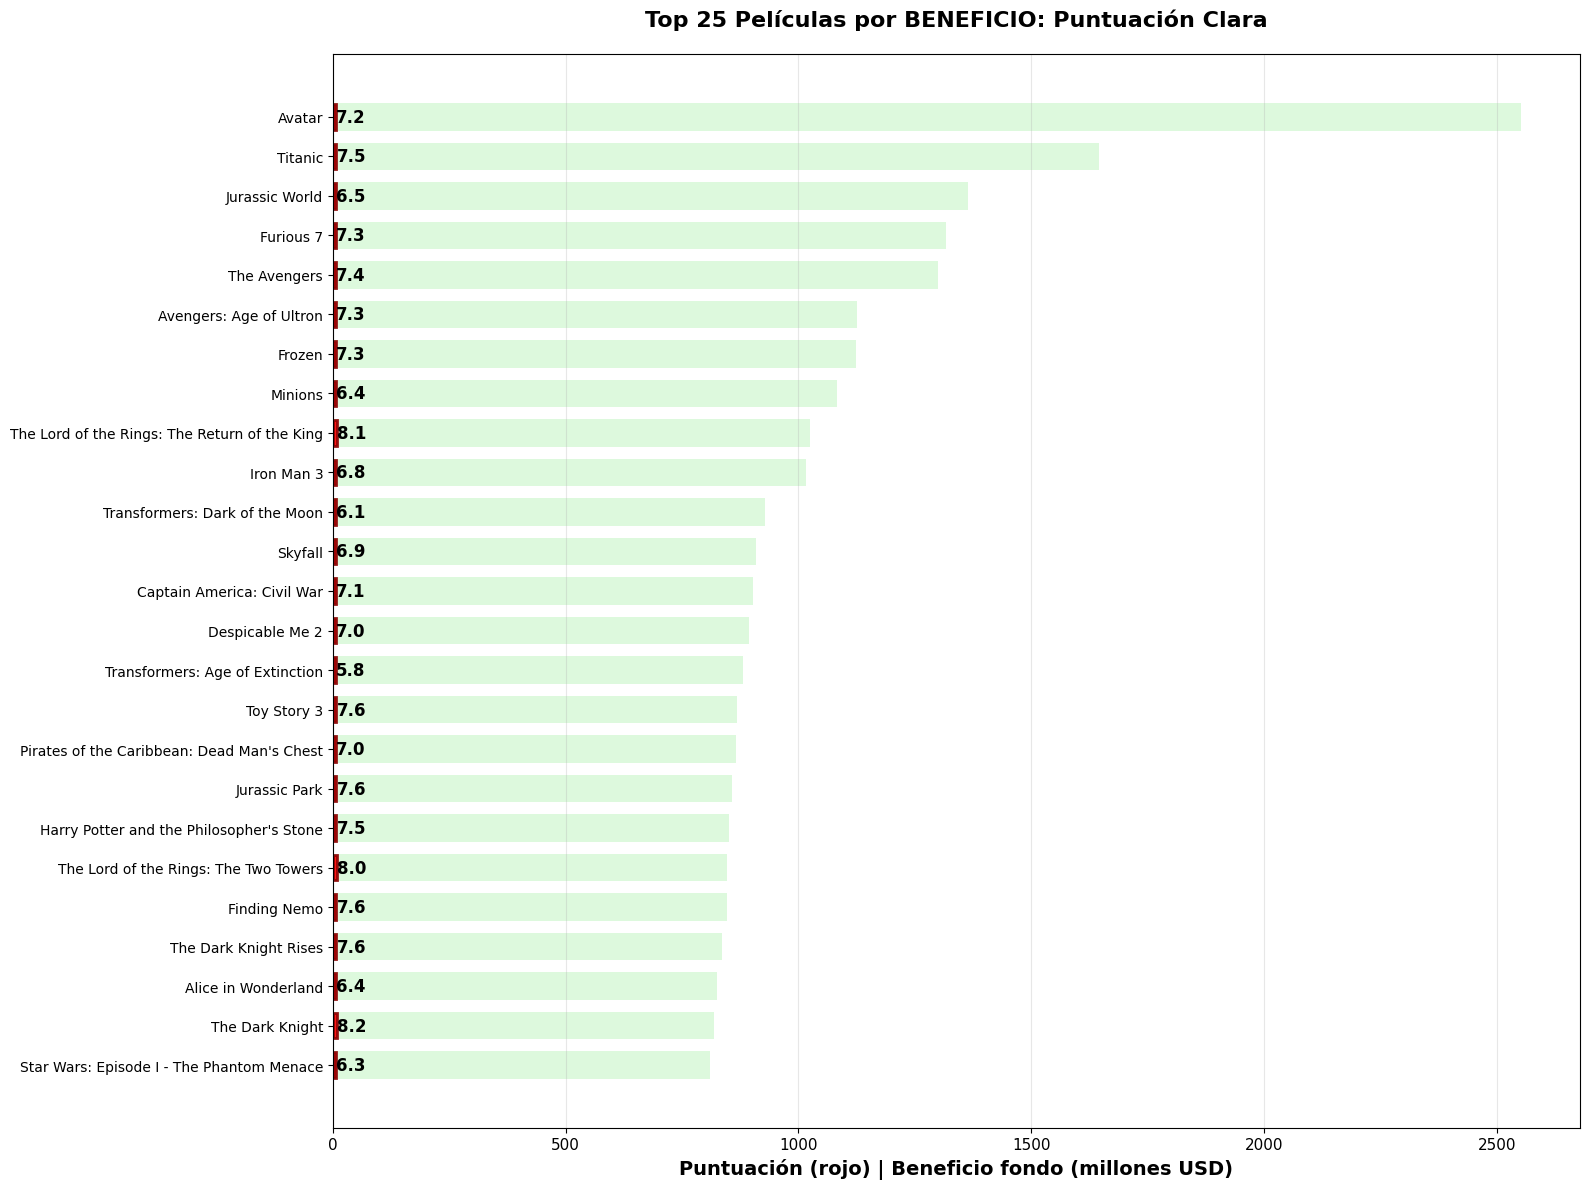

In [54]:
# Calcular beneficio = ingresos - presupuesto (ajusta nombres de columnas si es necesario)
df_films['beneficio'] = df_films['ganancia'] - df_films['presupuesto']  # o 'revenue', 'box_office'

# Top 25 por BENEFICIO (no presupuesto)
top25_beneficio = df_films.nlargest(25, 'beneficio')[['titulo', 'beneficio', 'puntuacion']]
top25_beneficio = top25_beneficio.sort_values('beneficio', ascending=False)
top25_beneficio['beneficio_millones'] = top25_beneficio['beneficio'] / 1_000_000

# Gráfico MISMO ESTILO pero con BENEFICIO
fig, ax = plt.subplots(figsize=(16, 12))

# Barras de beneficio (fondo sutil, en verde)
ax.barh(top25_beneficio['titulo'], top25_beneficio['beneficio_millones'], 
        color='lightgreen', alpha=0.3, height=0.7)

# Barras de puntuación MUY VISIBLES (rojas, gruesas)
bars = ax.barh(top25_beneficio['titulo'], top25_beneficio['puntuacion'], 
               color='red', alpha=0.9, height=0.65, edgecolor='darkred', linewidth=2)

# ETIQUETAS NUMÉRICAS EN CADA BARRA
for i, (bar, score) in enumerate(zip(bars, top25_beneficio['puntuacion'])):
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
            f'{score:.1f}', ha='left', va='center', fontweight='bold', fontsize=12)

# Configuración clara
ax.set_xlabel('Puntuación (rojo) | Beneficio fondo (millones USD)', fontsize=14, fontweight='bold')
ax.set_title('Top 25 Películas por BENEFICIO: Puntuación Clara', fontsize=16, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

plt.xticks(fontsize=11)
ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

Se puede concluir que, la media de puntuación obtenida de las 25 películas con mayores beneficios, mejora a la del top de películas con mayor presupuesto. Sin embargo, aún así, se demuestra que no van directamente relacionados el beneficio que se obtenga de una película y la valoración con la que se puntúe por los espectadores.